In [1]:
import os
os.chdir("C:/Program Files/Stata18/utilities")
from pystata import config
config.init("mp")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      StataNow 18.5
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Unlimited-user 2-core network, expiring  8 Jun 2025
Serial number: 501809316934
  Licensed to: Liming Lin
               Sciences Po

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [2]:
%%stata
infile prate mrate totpart totelg age totemp sole ltotemp using "D:\My Drive\Sciences Po\Spring 2025\Econometrics\HW\2\401k.raw"

(1,534 observations read)


Q1 Find the average participation rate and the average match rate in the sample of plans.

In [3]:
%%stata
mean prate


Mean estimation                          Number of obs = 1,534

--------------------------------------------------------------
             |       Mean   Std. err.     [95% conf. interval]
-------------+------------------------------------------------
       prate |   87.36291   .4268091      86.52572     88.2001
--------------------------------------------------------------


In [4]:
%%stata
mean mrate


Mean estimation                          Number of obs = 1,534

--------------------------------------------------------------
             |       Mean   Std. err.     [95% conf. interval]
-------------+------------------------------------------------
       mrate |   .7315124   .0199033      .6924718     .770553
--------------------------------------------------------------


Q2 Estimate the simple regression equation $prate_i = \beta_0 + \beta_1mrate_i + u_i$, and report the results along with the sample size and R-squared.

In [5]:
%%stata
reg prate mrate


      Source |       SS           df       MS      Number of obs   =     1,534
-------------+----------------------------------   F(1, 1532)      =    123.68
       Model |  32001.7271         1  32001.7271   Prob > F        =    0.0000
    Residual |  396383.812     1,532   258.73617   R-squared       =    0.0747
-------------+----------------------------------   Adj R-squared   =    0.0741
       Total |  428385.539     1,533  279.442622   Root MSE        =    16.085

------------------------------------------------------------------------------
       prate | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       mrate |   5.861079   .5270107    11.12   0.000      4.82734    6.894818
       _cons |   83.07546   .5632844   147.48   0.000     81.97057    84.18035
------------------------------------------------------------------------------


Q3 Compute the fitted values and residuals for each observation and verify that the residuals sum to (approximately) zero.

In [6]:
%%stata
predict pratehat,xb
predict res, residuals
total res


. predict pratehat,xb

. predict res, residuals

. total res

Total estimation                         Number of obs = 1,534

--------------------------------------------------------------
             |      Total   Std. err.     [95% conf. interval]
-------------+------------------------------------------------
         res |  -6.86e-06   629.7955     -1235.352    1235.352
--------------------------------------------------------------

. 


Q4 Interpret the intercept in your equation. Interpret the coefficient on mrate.

The intercept means that when the matching rate is $0$, the participation rate is $83.07\%$. The coefficient on mrate means that when the matching rate increases by $1$ dollar, the participation rate will increase by $5.861$ percentage points.

Q5 Find the predicted prate when $mrate = 3.5$. Is this a reasonable prediction? Explain what is happening here.

$83.07+3.5*5.861=103.58$. The prediction is not reasonable here because the participation cannot exceed $100$ and we do not limit the range of prate from $0$ to $100$.

Q6 How much of the variation in prate is explained by mrate? Is this a lot in your opinion?

According to the regression results, the R-squared is $0.0747$, meaning that $7.47\%$ of variation in the participation rate is explained by the matching rate. It is not a lot considering that the participation in the plan is an economic activitiy and thus the return rate should be a huge concern. Maybe the employees are likely to participate no matter how much their firms are contributing because the (401k) plan can help avoid taxation anyway.

Q7 Draw a scatterplot of prate against mrate. Round mrate to multiples of $0.1$ and calculate the average prate in these bins. Then draw a scatterplot of prate vs the binned mrate. What can you say about our specification in light of this plot? Add the predicted values to the plot.


. *Simple scatter plot between prate and mrate
. twoway (scatter prate mrate), ///
>     xtitle("Match Rate (mrate)") ytitle("Participation Rate (prate)") ///
>     title("Scatterplot of prate vs. mrate")

. 


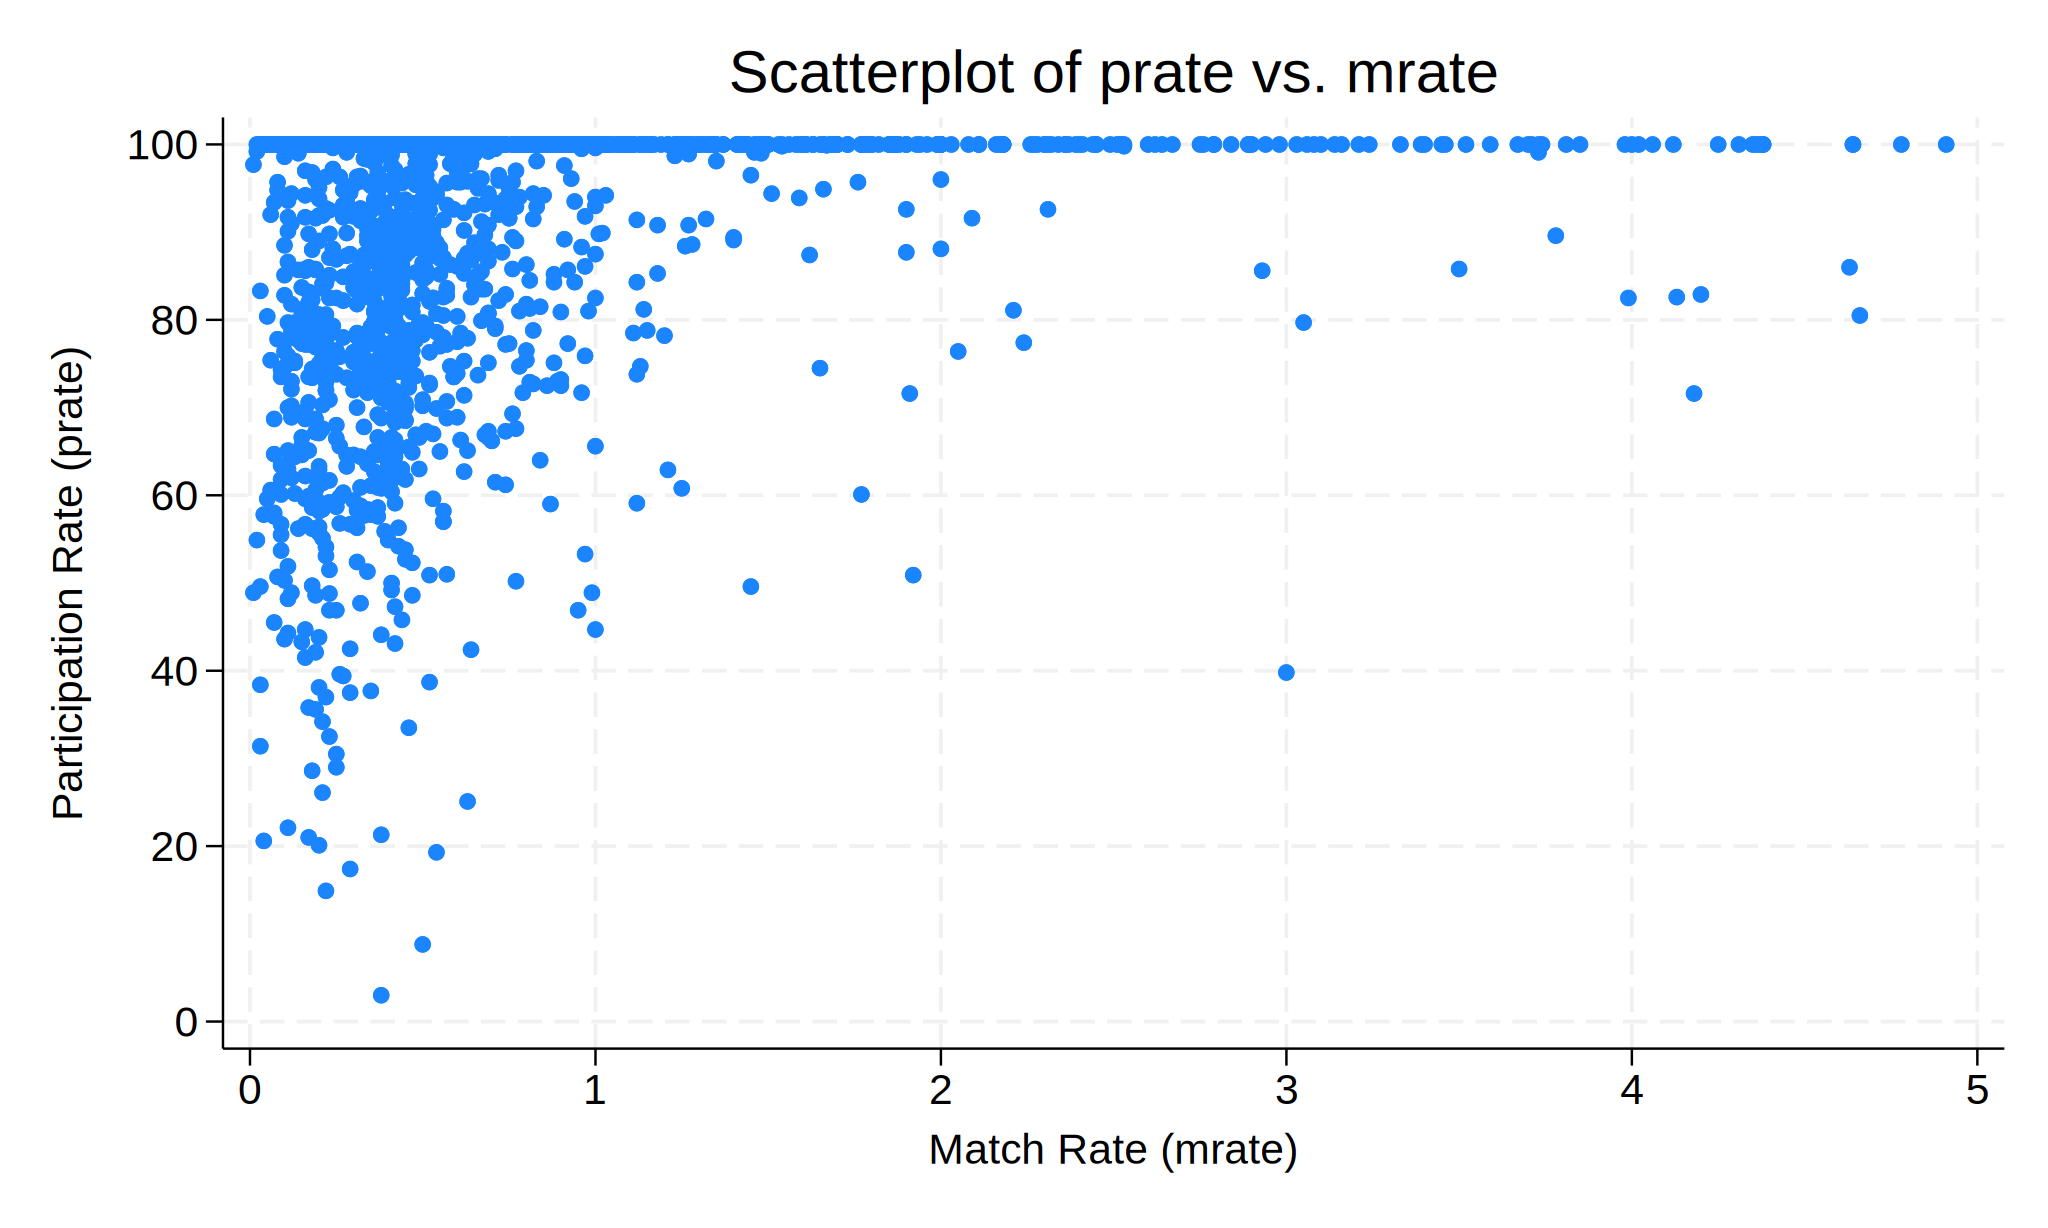

In [7]:
%%stata
*Simple scatter plot between prate and mrate
twoway (scatter prate mrate), ///
    xtitle("Match Rate (mrate)") ytitle("Participation Rate (prate)") ///
    title("Scatterplot of prate vs. mrate")

In [8]:
%%stata
*Round mrate to 0.1
gen mrater=round(mrate,0.1)


. *Round mrate to 0.1
. gen mrater=round(mrate,0.1)

. 



. *Scatterplot between average prate and binned mrate with predicted values
. preserve

. collapse (mean) prate pratehat, by(mrater)

. twoway (scatter prate mrater) ///
>        (line pratehat mrater, sort), ///
>        xtitle("Match Rate (binned)") ///
>        ytitle("Participation Rate") ///
>        legend(order(1 "Average Participation Rate" 2 "Predicted")) ///
>        title("Average Participation Rate vs. Fitted Values")

. restore

. 


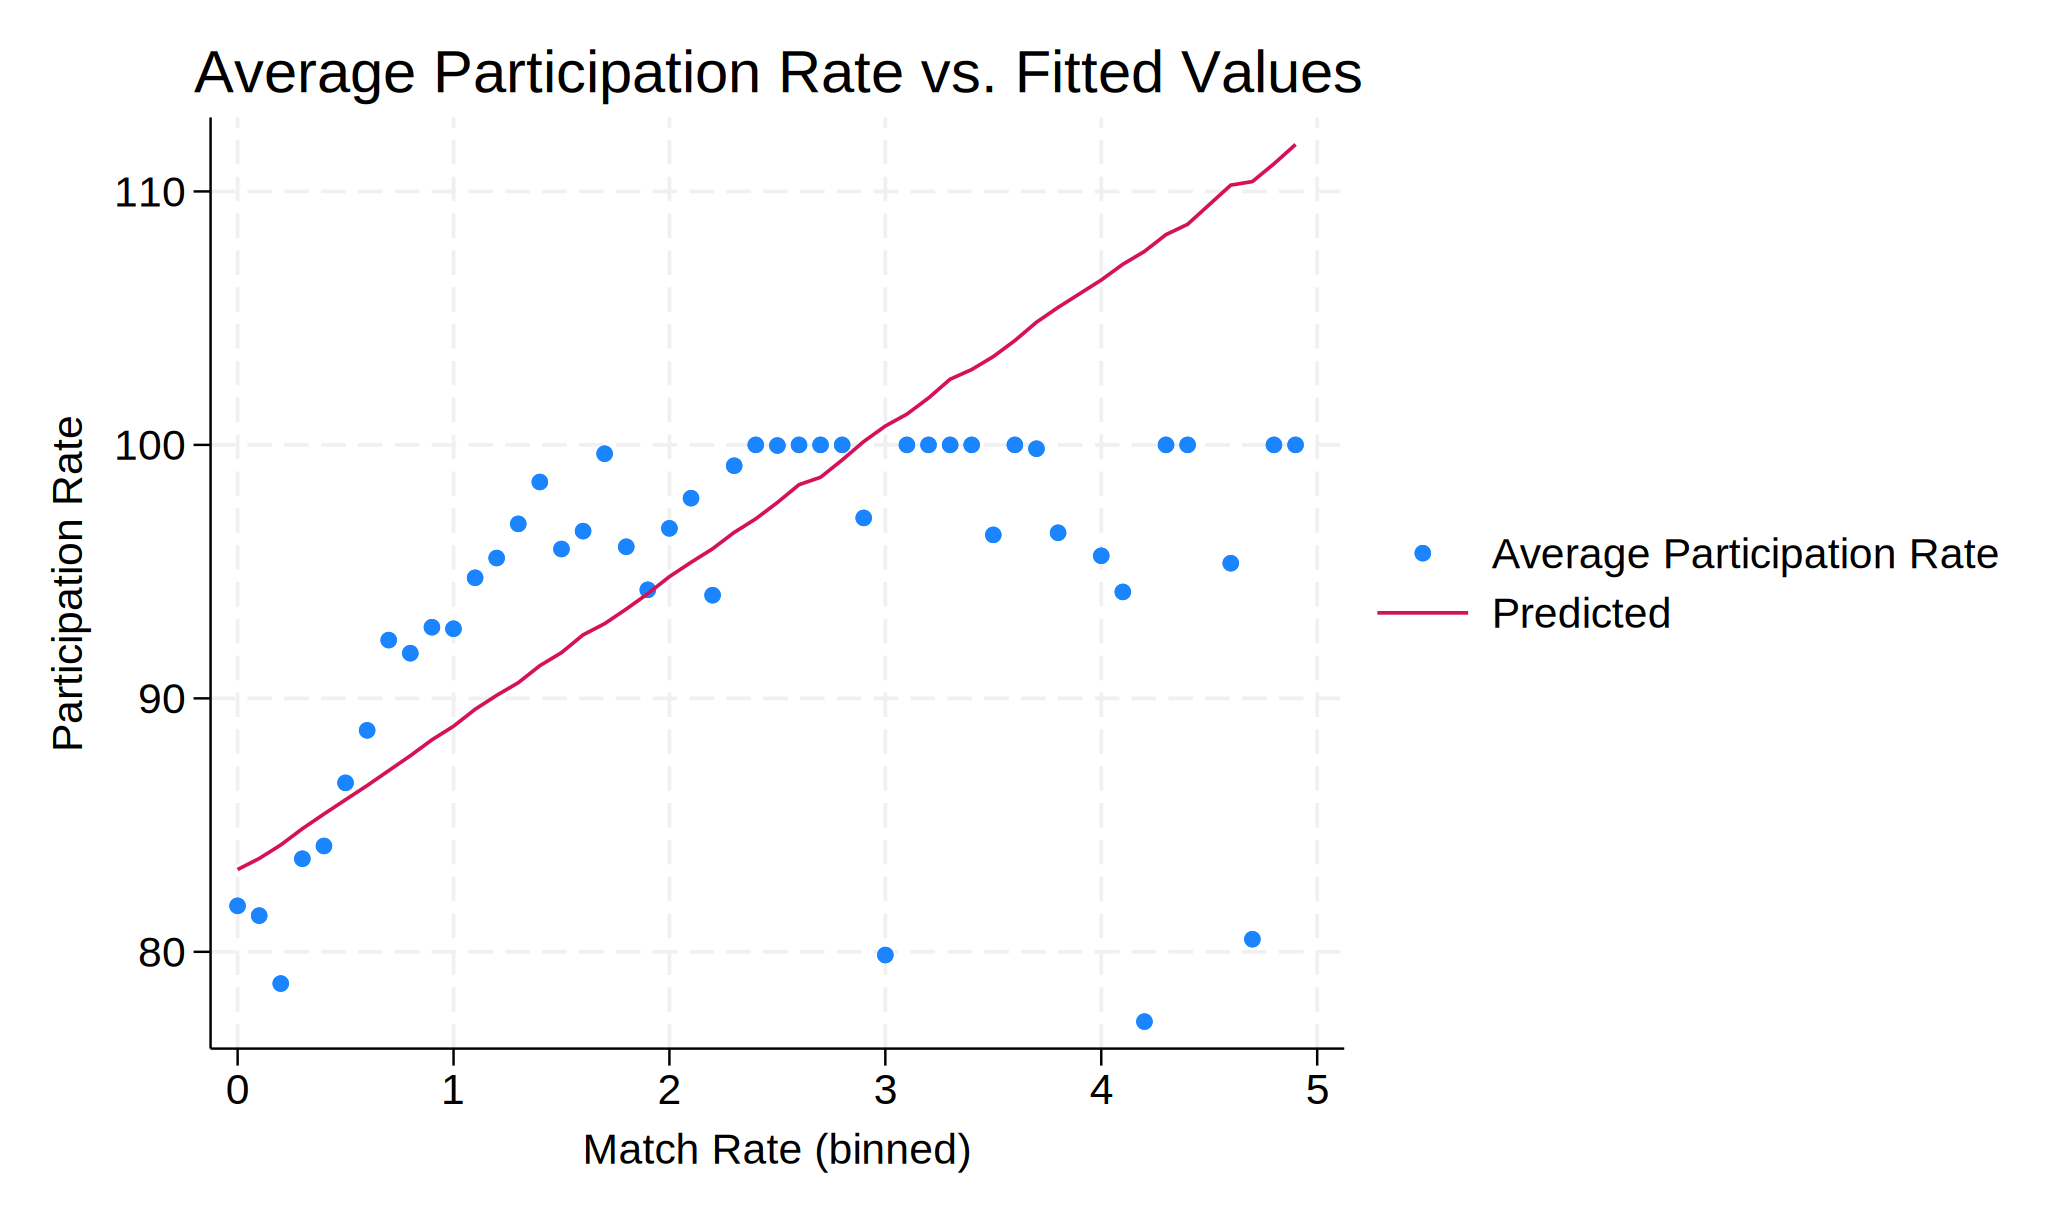

In [9]:
%%stata
*Scatterplot between average prate and binned mrate with predicted values
preserve
collapse (mean) prate pratehat, by(mrater)
twoway (scatter prate mrater) ///
       (line pratehat mrater, sort), ///
       xtitle("Match Rate (binned)") ///
       ytitle("Participation Rate") ///
       legend(order(1 "Average Participation Rate" 2 "Predicted")) ///
       title("Average Participation Rate vs. Fitted Values")
restore

By rounding the matching rate to $0.1$ and take the average of participation rate given the binned matching, the scatterplot better represents the positive linear relationship between the two variables. However, there still exist some problems with outliers and predicting participation rate over $100$.